<a id="99"></a>
# Python 2 Assignment
### Purpose: To make better use of Python's Markdown syntax and visualize data
<b>Program Sections</b>
<ul>
<li><a href = "#0">Import Python Packages</a></li>
<li><a href = "#1">Set Display</a></li>
<li><a href = "#2">Load the Data and Evaluate Fields</a></li>
<li><a href = "#3">Describe the Data</a></li>
<li><a href = "#4">Visualize the Data</a></li>
<li><a href = "#5">Assignment Submission</a></li></ul>

<a id="0"></a>
### Import Python Packages
<a href = "#99">Top</a>

In [1]:
import pandas as pd 
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import style

<a id="1"></a>
### Set Display
<a href = "#99">Top</a>

In [2]:
# Set display to show up to 100 columns in dataframe
pd.set_option('display.max_columns',100) 

<a id="2"></a>
### Load the Data and Evaluate Fields
<a href = "#99">Top</a>

In [3]:
# Read Excel file into dataframe
df_excel =  pd.ExcelFile('DataFinder Data Sample.xlsx') 

# Show worksheet names in dataframe from Excel file 
print(df_excel.sheet_names)

['Sheet1', 'Data']


In [4]:
# Load data from specific worksheet into dataframe
df_datafinder = df_excel.parse('Data')

In [5]:
# Provide a listing of the field names in the dataframe
df_datafinder.columns.values

array(['City', 'County', 'State', 'Zip', 'Country', 'DOB', 'URLSource',
       'AutoYear', 'Make', 'Model', 'AutoTrim', 'AutoVIN', 'Gender',
       'Source', 'Last4SSN', 'Employer', 'Occupation', 'LoanAmount',
       'LoanType', 'MonthlyIncome', 'EstimatedHouseholdIncome',
       'NetWorth', 'NumberCreditLines', 'RangeOfNewCredit', 'Education',
       'OccupationDetail', 'NumberOfChildren', 'PresenceOfChildren',
       'MaritalStatusInHousehold', 'HomeOwnerRenter', 'LengthOfResidence',
       'DwellingType', 'NumberOfAdults', 'HouseholdSize',
       'GenerationsInHousehold', 'MailOrderBuyer', 'MailerOrderResponder',
       'OnlinePurchasingIndicator', 'MembershipClubs',
       'ValuePriceGeneralMerchandiseBuyer', 'ApparelWomens',
       'ApparelWomensPetite', 'ApparelWomensPlusSize',
       'ApparelWomensYoung', 'ApparelMens', 'ApparelMensBigAndTall',
       'ApparelMensYoung', 'ApparelChildrens', 'HealthAndBeauty',
       'BeautyCosmetics', 'Jewelry', 'Luggage',
       'CardHolderAmer

In [6]:
# Show the number of rows and columns in the dataframe
df_datafinder.shape

(3719, 286)

In [7]:
# Drop columns 33 through 286 from the dataframe
df_datafinder.drop(df_datafinder.columns[32:285], axis=1, inplace=True)

In [8]:
# Rename some fields
df_datafinder = df_datafinder.rename(columns = {'DOB'       : 'Date of Birth',
                                                'AutoYear'  : 'Auto Year',
                                                'Make'      : 'Auto Make',
                                                'Model'     : 'Auto Model',
                                                'AutoTrim'  : 'Auto Trim',
                                                'LoanAmount': 'Mortgage Amount'})

In [9]:
# Shows the data type and number of non-null values in the fields
# There are a lot of fields with missing values
df_datafinder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3719 entries, 0 to 3718
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   City                      3719 non-null   object 
 1   County                    3719 non-null   object 
 2   State                     3719 non-null   object 
 3   Zip                       3719 non-null   object 
 4   Country                   1909 non-null   object 
 5   Date of Birth             3719 non-null   object 
 6   URLSource                 2426 non-null   object 
 7   Auto Year                 1898 non-null   float64
 8   Auto Make                 1891 non-null   object 
 9   Auto Model                1889 non-null   object 
 10  Auto Trim                 1290 non-null   object 
 11  AutoVIN                   1900 non-null   object 
 12  Gender                    3700 non-null   object 
 13  Source                    2372 non-null   object 
 14  Last4SSN

<a id="3"></a>
### Describe the Data
<a href = "#99">Top</a>

In [10]:
# Provide quick descriptive statistics on numeric fields
# Note that some fields should not be described this way ... like "Auto Year" and "Last4SSN"
df_datafinder.describe()

,Auto Year,Last4SSN,Mortgage Amount,MonthlyIncome,NumberCreditLines,NumberOfChildren,LengthOfResidence
count,1898.000000,2055.000000,263.000000,263.000000,2767.000000,2652.00000,3719.000000
mean,2005.160695,4978.249148,85702.003802,16041.311787,2.437658,1.48190,11.553912
std,6.617336,2913.098377,129155.824687,27782.129422,1.812924,1.23908,4.585596
min,1981.000000,10.000000,0.000000,0.000000,1.000000,0.00000,0.000000
25%,2002.000000,2444.000000,0.000000,0.000000,1.000000,1.00000,9.000000
50%,2007.000000,5015.000000,100.000000,0.000000,2.000000,1.00000,15.000000
75%,2010.000000,7567.500000,170000.000000,30000.000000,3.000000,2.00000,15.000000
max,2014.000000,9993.000000,825000.000000,130000.000000,9.000000,5.00000,15.000000


In [11]:
# Calculate the number of observations at each gender
# Note that the entries are inconsistent and will need cleaning ... an upcoming topic 
df_datafinder['Gender'].value_counts()

Female    1559
Male      1444
F          387
M          310
Name: Gender, dtype: int64

In [12]:
# Calculate percentages that fall in each category and format the results
df_datafinder['Education'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Completed High School           31.6%
Completed College               25.7%
Some College                    23.3%
Completed Grad School           13.5%
Did Not Complete High School     5.8%
Tech/Vocational Training         0.0%
Name: Education, dtype: object

<a id="4"></a>
### Visualize the Data
<a href = "#99">Top</a>

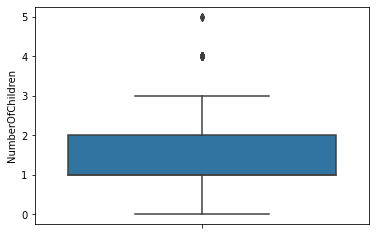

In [13]:
# Create a simple boxplot of a numerical field
sns.boxplot(y = "NumberOfChildren",  data = df_datafinder)

# Show the results; you can take this out but the results are cleaner this way
plt.show()

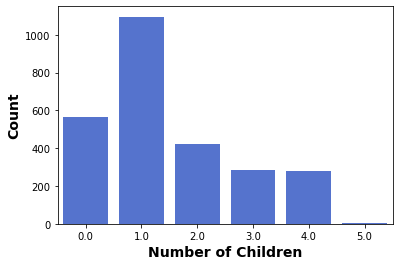

In [14]:
# Creating a column chart of the count of the records
sns.countplot(x = "NumberOfChildren",  data = df_datafinder, color = "royalblue")
# You can see color chocies at https://python-graph-gallery.com/100-calling-a-color-with-seaborn/

# Create a label for the x axis
plt.xlabel('Number of Children', fontweight='bold', fontsize='14', horizontalalignment='center')

# Create a label for the y axis in the chart
plt.ylabel('Count', fontweight='bold', fontsize='14', horizontalalignment='center')

plt.show()

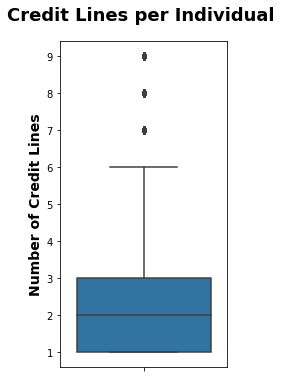

In [16]:
# Set the size of the visualization
plt.figure(figsize=(3,6))

# Set the actual visualization
sns.boxplot(y = "NumberCreditLines",  data = df_datafinder)

# Create a title for the overall plot
plt.suptitle('Credit Lines per Individual', fontweight='bold', 
          fontsize='18', horizontalalignment='center', y=0.96)

# Create a label for the y-axis in the plot
plt.ylabel('Number of Credit Lines', fontweight='bold', 
           fontsize='14', horizontalalignment='center')

plt.show()

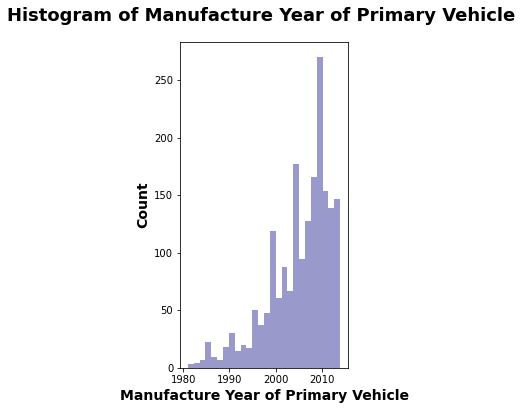

In [17]:
# Put only non-missing data into a list
autoYear = df_datafinder["Auto Year"].dropna()

plt.figure(figsize=(3,6))

# Set chart to a histogram
chart = sns.distplot(autoYear, kde=False, color = "navy");

plt.suptitle('Histogram of Manufacture Year of Primary Vehicle', fontweight='bold', 
          fontsize='18', horizontalalignment='center', y=.96)

plt.xlabel('Manufacture Year of Primary Vehicle', fontweight='bold', 
           fontsize='14', horizontalalignment='center')

plt.ylabel('Count', fontweight='bold', 
           fontsize='14', horizontalalignment='center')

plt.show()

In [19]:
# Find all values in a categorical field
print(df_datafinder['NetWorth'].unique())

['$25,000-49,999' '$50,000-99,999' '$250,000-499,999' '$10,000-24,999'
 '$100,000-249,999' nan '> $499,999' '$1-4,999' '< $1' '$5,000-9,999']


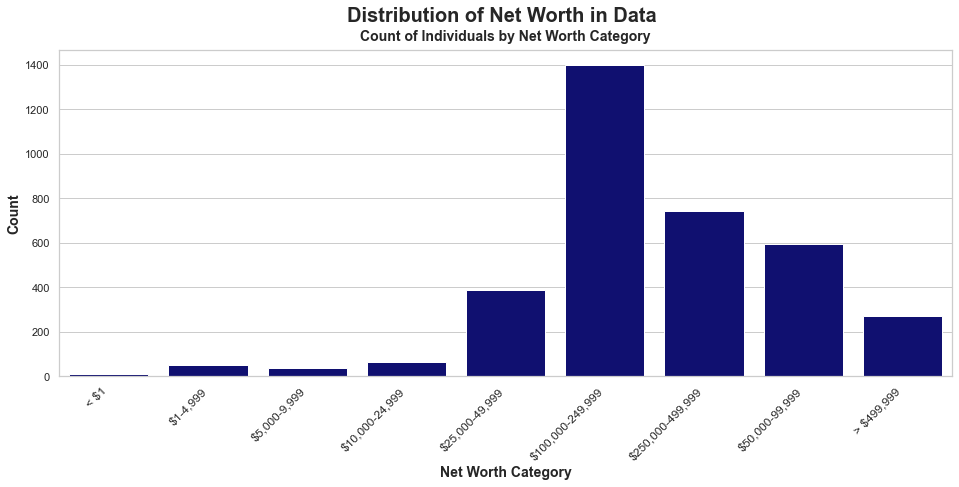

In [20]:
# Creating a professional-looking chart

# Set the order of the categories to be visualized
cols = ['< $1', '$1-4,999', '$5,000-9,999', '$10,000-24,999', '$25,000-49,999',
        '$100,000-249,999', '$250,000-499,999', '$50,000-99,999', '> $499,999']

# Set style and size of plot
sns.set(style='whitegrid')
plt.figure(figsize=(16,6))

# Define the chart as a count of number of observations, with pre-determined order
chart = sns.countplot(x = "NetWorth",
                      data = df_datafinder, 
                      order = cols, 
                      color= "navy")

# Set the size and alignment of the x axis labels and rotate them
chart.set_xticklabels(chart.get_xticklabels(), 
                      fontsize='12', rotation=45, 
                      horizontalalignment='right')

plt.suptitle('    Distribution of Net Worth in Data', fontweight='bold', 
          fontsize='20', horizontalalignment='center', y=.98)

# Create a secondary title with a different size and placement
plt.title('Count of Individuals by Net Worth Category', fontweight='bold', 
          fontsize='14', horizontalalignment='center', y=1.01)

# Create labels for the x and y axes
plt.xlabel('Net Worth Category', fontweight='bold', 
           fontsize='14', horizontalalignment='center')

plt.ylabel('Count', fontweight='bold', 
           fontsize='14', horizontalalignment='center')

plt.show()

<a id="5"></a>
### Assignment Submission
<a href = "#99">Top</a>

## Python Assignment 2
### Name: George Gannon

In [21]:
df_datafinder['LengthOfResidence'].describe()

count    3719.000000
mean       11.553912
std         4.585596
min         0.000000
25%         9.000000
50%        15.000000
75%        15.000000
max        15.000000
Name: LengthOfResidence, dtype: float64

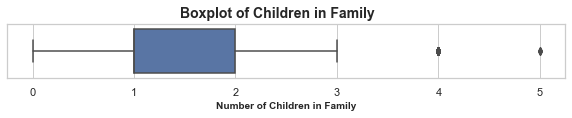

In [22]:
plt.figure(figsize=(10,1))
sns.boxplot(x = "NumberOfChildren", data = df_datafinder)
plt.suptitle('Boxplot of Children in Family', fontweight='bold', 
          fontsize='14', horizontalalignment='center', y = 1.12)
plt.xlabel('Number of Children in Family', fontweight='bold', 
           fontsize='10', horizontalalignment='center'); plt.show()

In [23]:
import datetime, socket
print(datetime.datetime.now().isoformat())
print("Your Computer Name is: " + socket.gethostname())
print("Your Computer IP Address is: " + socket.gethostbyname(socket.gethostname()))

2020-09-06T11:19:03.160113
Your Computer Name is: DESKTOP-0VRDGNF
Your Computer IP Address is: 192.168.1.139
